# Analyzing datapoints from Netflix datasets (EDA)

The objective of this project is to analyze sample data of Netflix userbase to get an idea about population parameters, particularly user preferences. Further, we will be comparing the results with another dataset on Netflix's streaming content to identify potential gaps to improve customer experience and in turn business scope. 

Libraries used:
    Pandas,
        Numpy,
        Visualization libraries.
   
For the uninitiated, Netflix is a popular streaming multi-device application that allows its users to access a whole host of movies, TV shows, documentaries without having to buy them physically(Clould PaaS). This service works on a tier based subscription model.

In [345]:
# Importing essential libraries. We will be using Pandas to load the .csv datasets to dataframe datastructures 
# built for handling large amounts of tabular data. Then, we will also be using matploblib to visualize the data. 
# Lastly, we will also be using seaborn (which is built upon matplotlib) to display some advanced visualizations.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None 

In [346]:
#Let's load the CSV files first, using the Pandas dataframes. We'll use the suffix '_raw_df' to
#indicate unprocessed data that might need cleaning, and filtering before use.


netflix_userbase_raw_df = pd.read_csv('Netflix Userbase.csv')
netflix_content_raw_df = pd.read_csv('netflix1.csv')

In [3]:
netflix_userbase_raw_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [4]:
netflix_content_raw_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
netflix_userbase_raw_df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [6]:
netflix_content_raw_df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

# Data Preparation & Cleaning

While the datapoints contain a wealth of information, we shall limit the analysis to the following areas:

1. Insights into the subscription types, revenue, countries, age, gender, and devices
2. Distribution of content on the platform, and audience preferences

In [7]:
netflix_userbase_raw_df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


For the purpose of this analysis, we will be using all the columns from userbase table except 'Join Date' and 'Last Payment Date.' These dates may not tell us whether a user was using the account for the whole duration or unsubscribed in between and then resubsribed.

In [8]:
selected_columns_userbase = ['Subscription Type',
                   'Monthly Revenue',
                    'Country',
                   'Age',
                   'Gender',
                   'Device']

In [9]:
netflix_content_raw_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [347]:
# Similarly, we shall limit our focus on below columns for content dataframe.
selected_columns_content = ['type',
                   'title',
                    'country',
                   'duration',
                   'listed_in']

In [11]:
netflix_content_raw_df.count()

show_id         8790
type            8790
title           8790
director        8790
country         8790
date_added      8790
release_year    8790
rating          8790
duration        8790
listed_in       8790
dtype: int64

In [12]:
netflix_content_raw_df.isna().sum()     
netflix_userbase_raw_df.isna().sum()  

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

Datasets do not contain any missing or NULL values, which is a good thing :) So, we need not worry about that. 

Let's extract a copy (using '.copy()' method) of the data from these columns into new data frames. Then, we can continue without affecting the original data frames.

In [348]:
netflix_content_df = netflix_content_raw_df[selected_columns_content].copy()
netflix_userbase_df = netflix_userbase_raw_df[selected_columns_userbase].copy()

In [14]:
netflix_content_df.head()

,type,title,country,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,90 min,Documentaries
1,TV Show,Ganglands,France,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,United States,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Brazil,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,United States,125 min,"Dramas, Independent Movies, International Movies"


In [15]:
netflix_userbase_df.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
0,Basic,10,United States,28,Male,Smartphone
1,Premium,15,Canada,35,Female,Tablet
2,Standard,12,United Kingdom,42,Male,Smart TV
3,Standard,12,Australia,51,Female,Laptop
4,Basic,10,Germany,33,Male,Smartphone


Our first challenge is to handle the entries in the netflix_content_df['listed_in'] field. It consists of multi-valued fields, containing unncessary terms like 'TV Shows', 'Movies' and more. Let's organize this information in a more standardized way that will give us a better idea of genres of each title. 

In [16]:
list(netflix_content_df['listed_in'].unique())           #List of all the genres

['Documentaries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies, Comedies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Children & Family Movies, Comedies, Music & Musicals',
 'Dramas, International Movies',
 'Children & Family Movies, Music & Musicals',
 'Dramas, International Movies, Music & Musicals',
 'Movies',
 'Comedies',
 'Docuseries, Reality TV',
 'British TV Shows, Crime TV Shows, Docuseries',
 'Children & Family Movies',
 "Kids' TV",
 'Documentaries, International Movies',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Comedies, International Movies, Romantic Movies',
 'Horror Movies, Sci-Fi & Fantasy',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'TV Comedies',
 'International TV Shows, TV Dramas, TV Thrillers',
 'Reality TV',
 "Anime Series, Kids' TV",
 "Kids' TV, Korea

We can observe a total of 513 unique 'listed_in' categories. On further inspection, we realize that many of these are repetations. In fact, some titles fall into multiple genres, which is common with any real world dataset. So, let's clean these entries.

In [17]:
#Creating a list of all unique items
genre_raw = []
for item in list(netflix_content_df['listed_in'].unique()):
    genre_raw.extend(item.strip().split(', '))         #Strip() removes whitespaces and newlines, split() fragments each line based on ','

len(genre_raw)             

1353

This list now contains 1353 genres. Let's build a helper function that will take dataframe field and list of unwanted phrases as inputs to return a refined set of valid genres. I have used my judgement to create a list of unwanted phrases and genres. There could be a potential judgemental bias. Anyway, let's proceed.

In [18]:
def clean(column_from_df, remove_list):   #defining function
    for phrase in remove_list:
        column_from_df = [x.replace(phrase,'') for x in column_from_df]
    column_from_df = set(column_from_df)
    return column_from_df

In [19]:
remove_list = [' Movies', ' TV Shows', 'TV ', ' TV', ' & Talk Shows','Movies', 'Independent','International', 'Shows']
genre = clean(genre_raw, remove_list)     #calling function      
genre.remove('')                          #removing any empty strings that might be there post cleaning
genre

{'Action & Adventure',
 'Anime Features',
 'Anime Series',
 'British',
 'Children & Family',
 'Classic',
 'Classic & Cult',
 'Comedies',
 'Crime',
 'Cult',
 'Documentaries',
 'Docuseries',
 'Dramas',
 'Faith & Spirituality',
 'Horror',
 "Kids'",
 'Korean',
 'LGBTQ',
 'Music & Musicals',
 'Mysteries',
 'Reality',
 'Romantic',
 'Sci-Fi & Fantasy',
 'Science & Nature',
 'Spanish-Language',
 'Sports',
 'Stand-Up Comedy',
 'Teen',
 'Thrillers'}

In [20]:
#Let's now create a new dataframe that will contain important details along with genres. 

genre_df = pd.DataFrame()
genre_df = netflix_content_df[['type','title','country','duration']].copy()   #creating a new copy, new memory allocated
genre_df[list(genre)] = False                                   #extending the list to contain 29 genres, each False initially   
genre_df

,type,title,country,duration,Romantic,Sports,Korean,Dramas,Children & Family,Faith & Spirituality,...,Science & Nature,Stand-Up Comedy,Docuseries,Thrillers,Classic & Cult,Classic,Comedies,Cult,Mysteries,Sci-Fi & Fantasy
0,Movie,Dick Johnson Is Dead,United States,90 min,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,TV Show,Ganglands,France,1 Season,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,TV Show,Midnight Mass,United States,1 Season,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Movie,Confessions of an Invisible Girl,Brazil,91 min,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Movie,Sankofa,United States,125 min,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Turkey,2 Seasons,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,TV Show,Zak Storm,United States,3 Seasons,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8787,TV Show,Zindagi Gulzar Hai,Pakistan,1 Season,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8788,TV Show,Yoko,Pakistan,1 Season,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
len(genre)              #We have narrowed down the nos of genre entries from 1353 to just 29 unique values

29

Now we will use a simple iteration to assign True values to all the genres a title falls in. We will check which titles belong to a particular genre, and use their index numbers to assign True value in genre_df  


In [22]:
for item in genre:
    temp = netflix_content_df[['type']][netflix_content_df['listed_in'].str.contains(item)]

    for i in temp.index:
         genre_df[item].loc[i] = True

In [349]:
genre_df                #Voila! Now we have successfully structured the genres

,type,title,country,duration,duration_min,nos_seasons,Science & Nature,Crime,Romantic,Docuseries,...,Documentaries,Sci-Fi & Fantasy,Comedies,Anime Series,Faith & Spirituality,Music & Musicals,Horror,Kids',Spanish-Language,Stand-Up Comedy
0,Movie,Dick Johnson Is Dead,United States,90 min,90.0,NaN,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,TV Show,Ganglands,France,1 Season,NaN,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,TV Show,Midnight Mass,United States,1 Season,NaN,1.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Movie,Confessions of an Invisible Girl,Brazil,91 min,91.0,NaN,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Movie,Sankofa,United States,125 min,125.0,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Turkey,2 Seasons,NaN,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,TV Show,Zak Storm,United States,3 Seasons,NaN,3.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8787,TV Show,Zindagi Gulzar Hai,Pakistan,1 Season,NaN,1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8788,TV Show,Yoko,Pakistan,1 Season,NaN,1.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [25]:
#Let's repeat the same process to classify duration into 'minutes' and 'number of seasons' 

duration_raw_df = pd.DataFrame(columns = ['duration_min','nos_seasons'])
duration_raw_df['duration'] = genre_df['duration'].copy()

seasons_index = list(genre_df[genre_df['duration'].str.contains('Season')].index)
seasons_index

mins_index = list(genre_df[genre_df['duration'].str.contains('min')].index)
mins_index

duration_raw_df['duration'] = [x.replace(' min','') for x in duration_raw_df['duration']]
duration_raw_df['duration'] = [x.replace(' Season','') for x in duration_raw_df['duration']]
duration_raw_df['duration'] = [x.replace('s','') for x in duration_raw_df['duration']]


for item in seasons_index:
    duration_raw_df['nos_seasons'].loc[item] = duration_raw_df['duration'].loc[item]
for item in mins_index:
    duration_raw_df['duration_min'].loc[item] = duration_raw_df['duration'].loc[item]

duration_raw_df

,duration_min,nos_seasons,duration
0,90,NaN,90
1,NaN,1,1
2,NaN,1,1
3,91,NaN,91
4,125,NaN,125
...,...,...,...
8785,NaN,2,2
8786,NaN,3,3
8787,NaN,1,1
8788,NaN,1,1


In [26]:
#Add these columns to our main dataframe and redorder the sequence for convenience ('duration','duration_min','nos_seasons')

genre_df['duration_min'] = duration_raw_df['duration_min']
genre_df['nos_seasons'] = duration_raw_df['nos_seasons']

genre_df = genre_df[['type', 'title', 'country', 'duration','duration_min',
       'nos_seasons', 'Science & Nature', 'Crime',
       'Romantic', 'Docuseries', 'Korean', 'Children & Family',
       'Action & Adventure', 'Dramas', 'Mysteries', 'Anime Features', 'Sports',
       'Thrillers', 'Reality', 'Classic & Cult', 'LGBTQ', 'British', 'Cult',
       'Classic', 'Teen', 'Documentaries', 'Sci-Fi & Fantasy', 'Comedies',
       'Anime Series', 'Faith & Spirituality', 'Music & Musicals', 'Horror',
       "Kids'", 'Spanish-Language', 'Stand-Up Comedy']]

Let's convert object datatype to numeric one for numerical analysis and visualizations.

In [27]:
genre_df['nos_seasons'] = pd.to_numeric(genre_df['nos_seasons'], errors = 'coerce')
genre_df['duration_min'] = pd.to_numeric(genre_df['duration_min'], errors = 'coerce')
genre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  8790 non-null   object 
 1   title                 8790 non-null   object 
 2   country               8790 non-null   object 
 3   duration              8790 non-null   object 
 4   duration_min          6126 non-null   float64
 5   nos_seasons           2664 non-null   float64
 6   Science & Nature      8790 non-null   bool   
 7   Crime                 8790 non-null   bool   
 8   Romantic              8790 non-null   bool   
 9   Docuseries            8790 non-null   bool   
 10  Korean                8790 non-null   bool   
 11  Children & Family     8790 non-null   bool   
 12  Action & Adventure    8790 non-null   bool   
 13  Dramas                8790 non-null   bool   
 14  Mysteries             8790 non-null   bool   
 15  Anime Features       

In [28]:
genre_df.describe()                #Returns basis statistical information about numeric columns

,duration_min,nos_seasons
count,6126.000000,2664.000000
mean,99.584884,1.751877
std,28.283225,1.550622
min,3.000000,1.000000
25%,87.000000,1.000000
50%,98.000000,1.000000
75%,114.000000,2.000000
max,312.000000,17.000000


In [29]:
genre_df.shape

(8790, 35)

In [30]:
netflix_userbase_df.shape

(2500, 6)

In [31]:
netflix_userbase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Country            2500 non-null   object
 3   Age                2500 non-null   int64 
 4   Gender             2500 non-null   object
 5   Device             2500 non-null   object
dtypes: int64(2), object(4)
memory usage: 117.3+ KB


In [32]:
netflix_userbase_df.describe()

,Monthly Revenue,Age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


With this, we have completed our preprocessing. To summarize, we improved the structure of 'genre' categorization, followed
by proper classification of duration of each title. Let's move to the next step.

# Exploratory Analysis and Visualization

Before we ask questions about the data, it would help to understand the data's demographics, i.e., country, age, etc. It's essential to explore these variables to understand how representative the dataset is. A sample of this scale generally tends to have some selection bias.

We will be exploring two dataframes:

    1. netflix_userbase_df
    2. genre_df

In [51]:
#Let's set some default settings for our visualizations
sns.set_style('whitegrid')            
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [57]:
netflix_userbase_df

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device
0,Basic,10,United States,28,Male,Smartphone
1,Premium,15,Canada,35,Female,Tablet
2,Standard,12,United Kingdom,42,Male,Smart TV
3,Standard,12,Australia,51,Female,Laptop
4,Basic,10,Germany,33,Male,Smartphone
...,...,...,...,...,...,...
2495,Premium,14,Spain,28,Female,Smart TV
2496,Basic,15,Spain,33,Female,Smart TV
2497,Standard,12,United States,38,Male,Laptop
2498,Standard,13,Canada,48,Female,Tablet


In [54]:
#Let's see how the sample data is distributed country wise

netflix_userbase_df.Country.value_counts()

United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: Country, dtype: int64

Text(0.5, 1.0, 'Netflix users country wise')

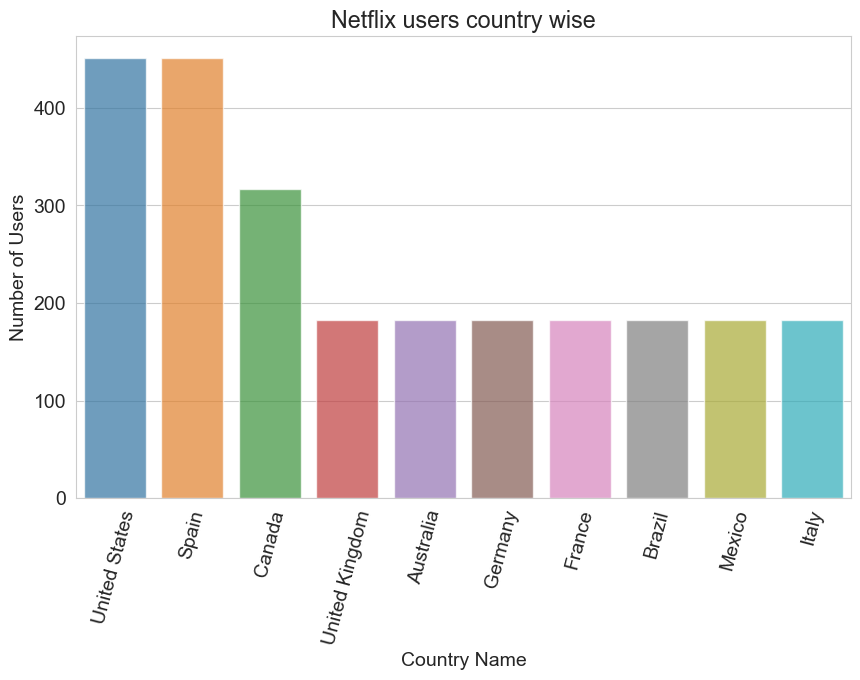

In [56]:
ax = sns.countplot(x = netflix_userbase_df.Country, alpha = 0.7, order = netflix_userbase_df.Country.value_counts().index,  )

plt.xticks(rotation = 75)
plt.xlabel('Country Name')
plt.ylabel('Number of Users')
plt.title('Netflix users country wise')


Text(0.5, 1.0, 'Percentage distribution of subscription choice')

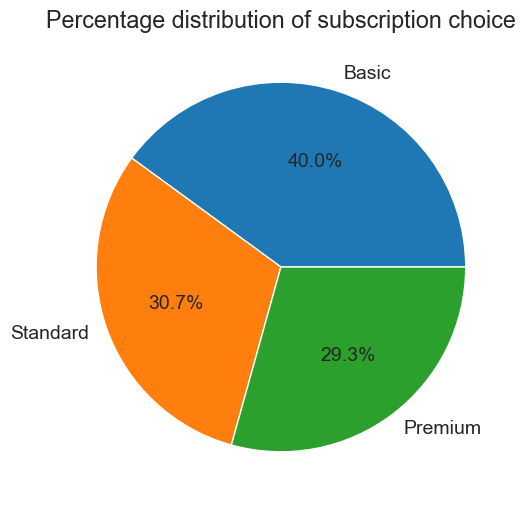

In [58]:
#Let's see how the sample data is distributed based on subscription type
plt.pie(netflix_userbase_df['Subscription Type'].value_counts(), labels = netflix_userbase_df['Subscription Type'].value_counts().index, autopct='%1.1f%%' )

plt.title('Percentage distribution of subscription choice')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'India'),
  Text(2, 0, 'United Kingdom'),
  Text(3, 0, 'Pakistan'),
  Text(4, 0, 'Not Given'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'South Korea'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Spain')])

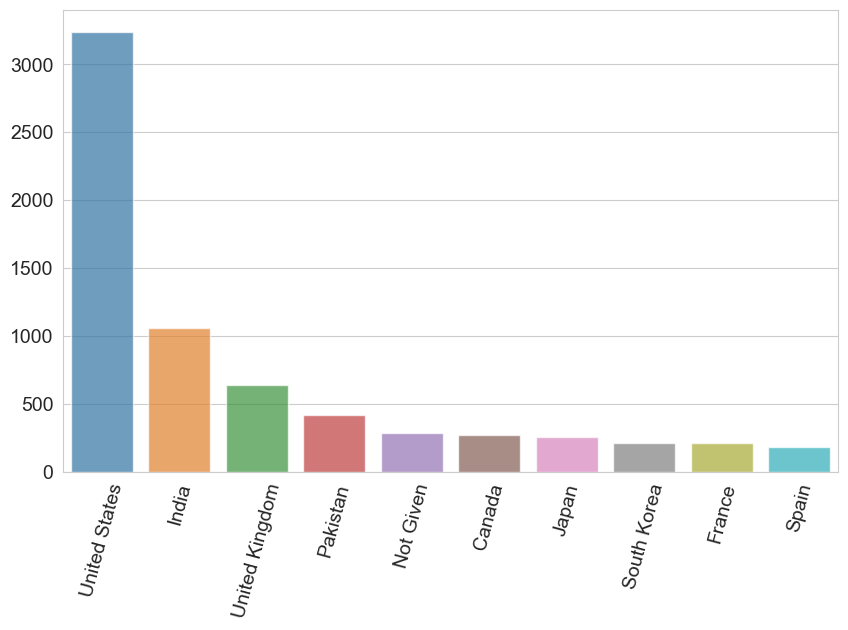

In [78]:
#Let's see which countries have the largest contribution in content creation
country_content = genre_df.country.value_counts().head(10)
sns.barplot(x  = country_content.index, y = country_content.values, alpha = 0.7 )
plt.xticks(rotation = 75)

<Figure size 400x400 with 0 Axes>

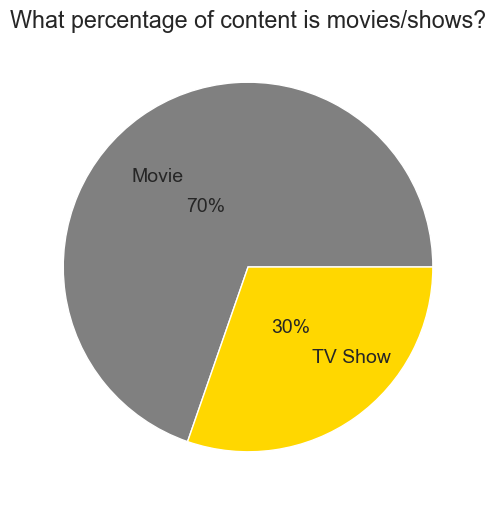

<Figure size 400x400 with 0 Axes>

In [350]:
# Percentage of content that is movies/shows
ax = plt.pie(genre_df.type.value_counts(), labels = genre_df.type.value_counts().index, autopct='%.0f%%', colors = ['grey', 'gold'],  labeldistance=0.6, pctdistance= 0.4) 
plt.title('What percentage of content is movies/shows?')
plt.figure(figsize = (4,4))

Apparently, this data tends to follow a z-distribution (normally distributed with minor inconsistencies). However, it is right skewed with some longer than usual movies, pulling the overall mean towards right.

# Asking and Answering Questions

We've already gained several insights about the userbase and genre data by exploring individual columns of the datasets. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

### 1. Subscription Type Analysis:

    What are the counts of each subscription type?
    What is the distribution of subscription types across different countries?

In [123]:
# What are the counts of each subscription type?
netflix_userbase_df['Subscription Type'].value_counts()

Basic       999
Standard    768
Premium     733
Name: Subscription Type, dtype: int64

Text(0.5, 1.0, 'Countrywise users based on subscription type')

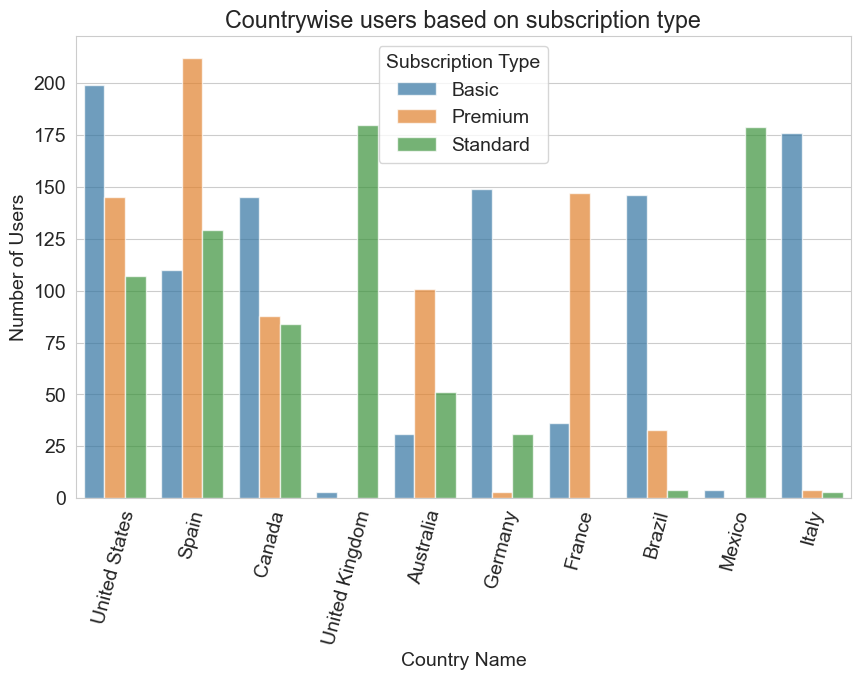

In [36]:
# What is the distribution of subscription types across different countries?

ax = sns.countplot(x = netflix_userbase_df.Country, alpha = 0.7, order = netflix_userbase_df.Country.value_counts().index, hue = netflix_userbase_df['Subscription Type'] )

plt.xticks(rotation = 75)
plt.xlabel('Country Name')
plt.ylabel('Number of Users')
plt.title('Countrywise users based on subscription type')

# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])
# ax.bar_label(ax.containers[2])

### 2. Revenue Analysis:

    What is the total revenue generated by each subscription type?
    What is the average revenue per subscription type?
    How does the revenue vary by country?

In [125]:
#What is the total revenue generated by each subscription type?

netflix_userbase_df.groupby('Subscription Type')['Monthly Revenue'].sum()

Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64

In [128]:
#What is the average revenue per subscription type?

netflix_userbase_df.groupby('Subscription Type')['Monthly Revenue'].mean().round(2)

Subscription Type
Basic       12.48
Premium     12.59
Standard    12.46
Name: Monthly Revenue, dtype: float64

In [157]:
#How does the revenue vary by country?

revenue_country = netflix_userbase_df.groupby('Country')['Monthly Revenue'].sum().sort_values(ascending = False).head(5)

revenue_country

Country
United States     5664
Spain             5662
Canada            3950
United Kingdom    2318
Italy             2317
Name: Monthly Revenue, dtype: int64

(array([], dtype=float64), [])

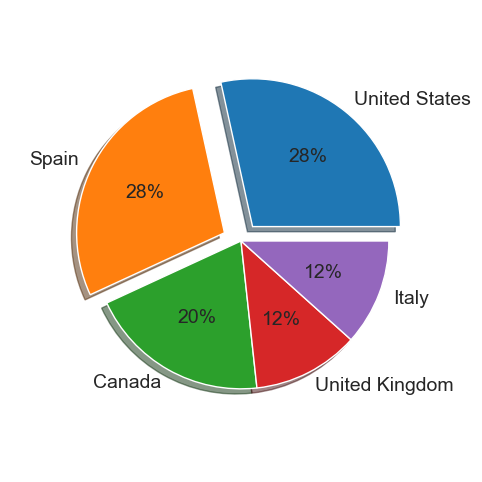

In [179]:
ax = plt.pie(revenue_country, labels = revenue_country.index, autopct='%.0f%%', shadow = True,  explode = (0.1,0.1,0,0,0), radius = 0.8)
plt.xticks(rotation = 75)

### 3. Age Analysis:

    What is the distribution of ages among subscribers?
    How does the average age differ between countries?

Text(0.5, 1.0, 'Age wise distribution among subscribers')

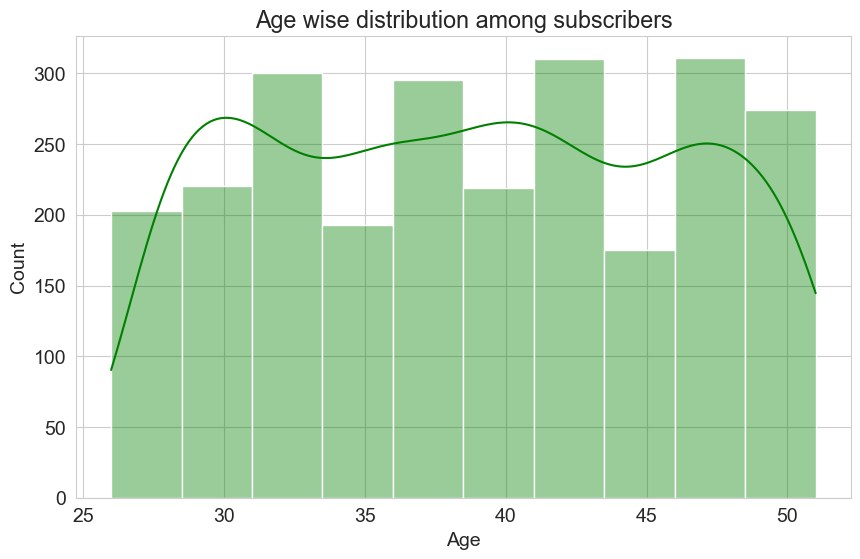

In [191]:
#What is the distribution of ages among subscribers?

sns.histplot(netflix_userbase_df['Age'], bins = 10, color = 'green', alpha = 0.4, kde = True)
plt.title('Age wise distribution among subscribers')

Observation: There is no normal distribution of ages. Perhaps, the sample is not random but rather based on judgement sampling.

In [217]:
#How does the average age differ between countries?

netflix_userbase_df.groupby('Country')[['Age']].mean().sort_values('Age',ascending = False)

,Age
Country,
United Kingdom,39.191257
France,39.109290
Germany,39.038251
United States,38.926829
Mexico,38.830601
Spain,38.800443
Canada,38.697161
Italy,38.551913
Australia,38.355191


### 4. Device Analysis:

    Which devices are most commonly used by subscribers country wise?
    Is there a correlation between device usage and subscription type or revenue?

Text(0.5, 1.0, 'Number of Netflix users')

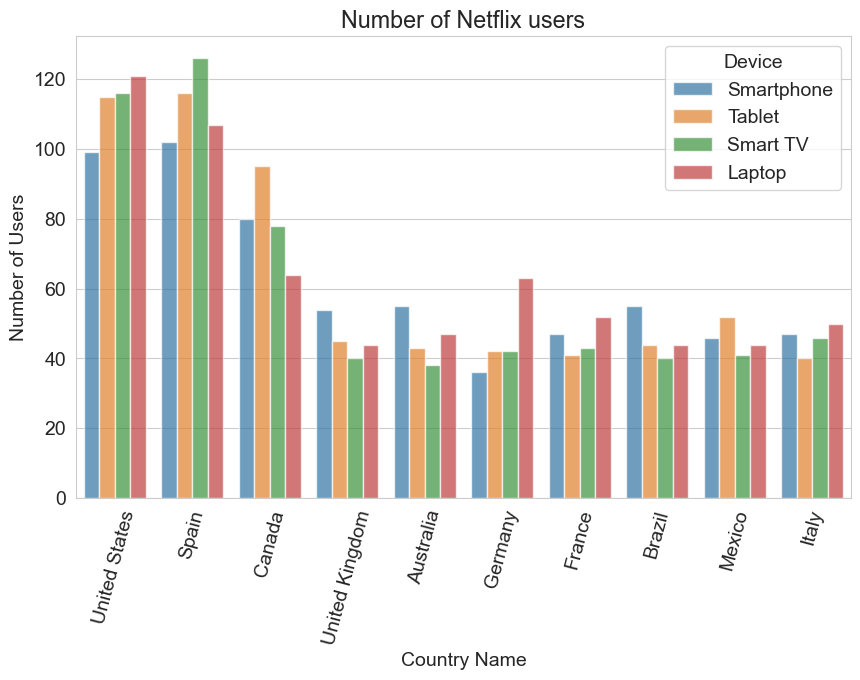

In [207]:
sns.countplot(x = netflix_userbase_df.Country, alpha = 0.7, order = netflix_userbase_df.Country.value_counts().index, hue = netflix_userbase_df['Device'] )

plt.xticks(rotation = 75)
plt.xlabel('Country Name')
plt.ylabel('Number of Users')
plt.title('Number of Netflix users')


Observation: United States and Spain have the highest number of subscribers (based on dataset). Smart TV is a more popular streaming device compared to other mediums in Spain. Whereas, in the US, Laptop is the most popular medium.

In [224]:
#Let's check if device preference has an influence on average monthly revenue
netflix_userbase_df.groupby('Device')['Monthly Revenue'].mean().round(2)

Device
Laptop        12.57
Smart TV      12.48
Smartphone    12.38
Tablet        12.59
Name: Monthly Revenue, dtype: float64

Observation: Indeed, those who use Tablets and Laptops to stream Netflix pay more. However, the difference is not significantly different.

In [ ]:
#What's the longest documentary movie?

genre_df[genre_df['type'] == 'Movie'][['title','duration_min', 'Documentaries']].sort_values('duration_min', ascending = False)

In [225]:
genre_df

,type,title,country,duration,duration_min,nos_seasons,Science & Nature,Crime,Romantic,Docuseries,...,Documentaries,Sci-Fi & Fantasy,Comedies,Anime Series,Faith & Spirituality,Music & Musicals,Horror,Kids',Spanish-Language,Stand-Up Comedy
0,Movie,Dick Johnson Is Dead,United States,90 min,90.0,NaN,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,TV Show,Ganglands,France,1 Season,NaN,1.0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,TV Show,Midnight Mass,United States,1 Season,NaN,1.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,Movie,Confessions of an Invisible Girl,Brazil,91 min,91.0,NaN,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,Movie,Sankofa,United States,125 min,125.0,NaN,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Turkey,2 Seasons,NaN,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8786,TV Show,Zak Storm,United States,3 Seasons,NaN,3.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8787,TV Show,Zindagi Gulzar Hai,Pakistan,1 Season,NaN,1.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8788,TV Show,Yoko,Pakistan,1 Season,NaN,1.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


Moving on to the next dataset (genre_df)

### 5. Country Analysis:

    Which countries produce the most content?
    Is there a difference in content preferences between countries?

In [271]:
# Which countries produce the most content?

genre_df.country.value_counts().sort_values(ascending = False).head(3)

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Name: country, dtype: int64

Text(0.5, 1.0, 'Highest content producing countries')

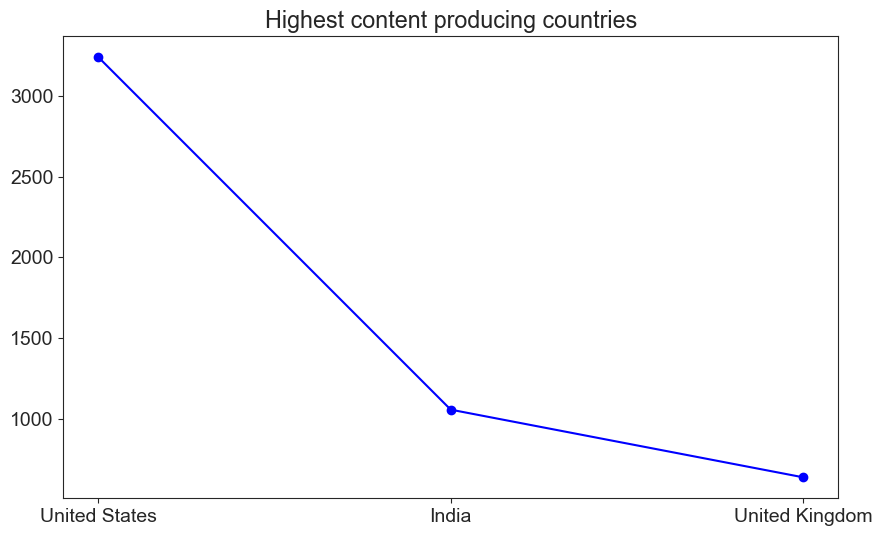

In [295]:
sns.set_style('ticks')
plt.plot(genre_df.country.value_counts().sort_values(ascending = False).head(3), color = 'blue', marker='o', linestyle='-',  )
plt.title('Highest content producing countries')

Observation: The US is the biggest content producing country. It is also the largest in terms of subscribers. Perhaps, Netflix is focusing more on customer retention here by actively creating new content that caters to domestic audience's interests (Drama).

<Axes: xlabel='Number of items (Shows/Movies)'>

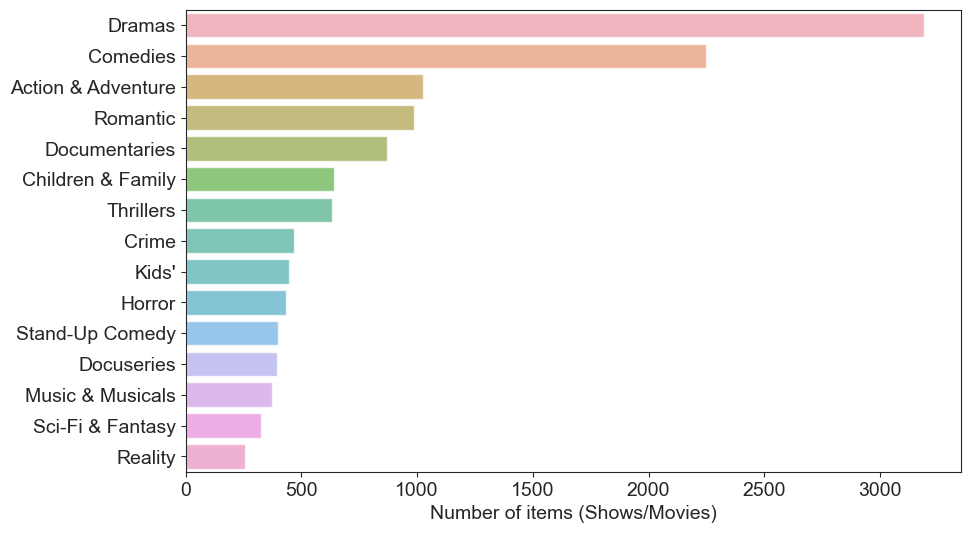

In [300]:
# Is there a difference in content preferences between countries?

genre_val = genre_df[['Science & Nature', 'Crime', 'Romantic', 'Docuseries', 'Korean',
       'Children & Family', 'Action & Adventure', 'Dramas', 'Mysteries',
       'Anime Features', 'Sports', 'Thrillers', 'Reality', 'Classic & Cult',
       'LGBTQ', 'British', 'Cult', 'Classic', 'Teen', 'Documentaries',
       'Sci-Fi & Fantasy', 'Comedies', 'Anime Series', 'Faith & Spirituality',
       'Music & Musicals', 'Horror', "Kids'", 'Spanish-Language',
       'Stand-Up Comedy']].sum()

genre_val.sort_values(ascending = False).head(10)

genre_val = genre_val.sort_values(ascending = False).head(15)
plt.xlabel('Number of items (Shows/Movies)')
sns.barplot(y = genre_val.index, x = genre_val, alpha = 0.7, )

In [297]:
#What percentage of Dramas are movies?

drama = (genre_df[genre_df['Dramas'] == True]['type'] == 'Movie').sum() * 100/(genre_df['Dramas'] == True).count()
print("{:.2f}% of all Dramas are movies".format(drama))

27.60% of all Dramas are movies


In [306]:
#What are the top 5 longest movies?

for i in genre_df[genre_df['type'] == 'Movie']['duration_min'].sort_values(ascending = False).head(5).index:
    print(str(genre_df['title'].loc[i]) + "     " + str(genre_df['duration_min'].loc[i]) + " minutes")

Black Mirror: Bandersnatch     312.0 minutes
Headspace: Unwind Your Mind     273.0 minutes
The School of Mischief     253.0 minutes
No Longer kids     237.0 minutes
Lock Your Girls In     233.0 minutes


### 6.Specific Genre Analysis:

    How does the presence of specific genres (e.g., Science & Nature, Crime, Romantic) vary between movies and TV shows?
    Are there any genres that are more common in certain countries?

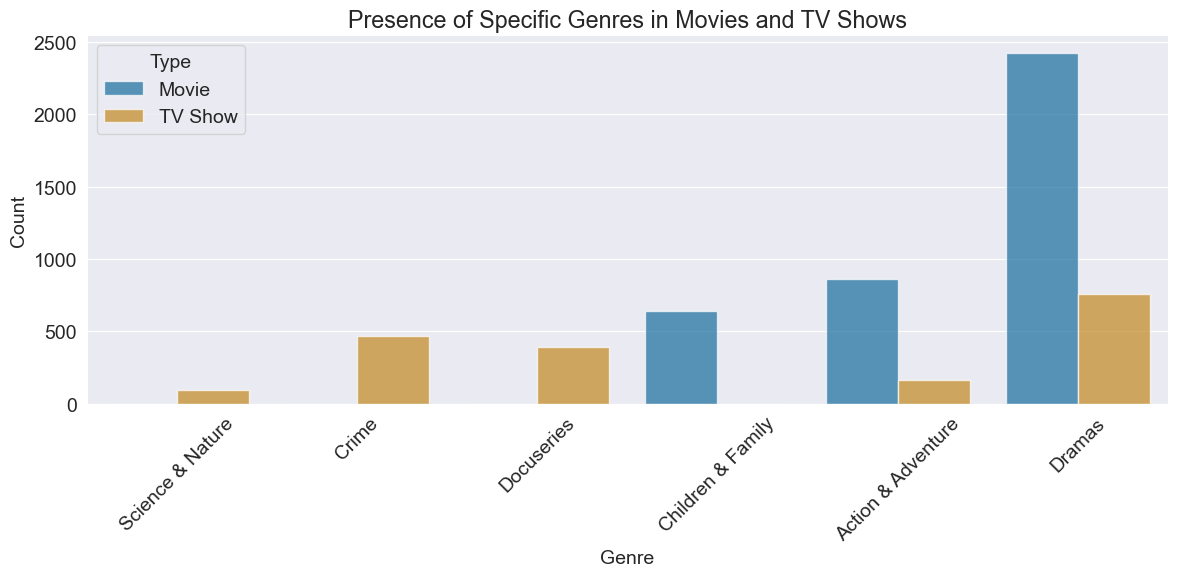

In [344]:
genres = ['Science & Nature', 'Crime', 'Docuseries',
       'Children & Family', 'Action & Adventure', 'Dramas']


# Count the number of occurrences of each genre in movies and TV shows
genre_counts = genre_df.groupby('type')[genres].sum().reset_index()

# Melt the DataFrame to have a single column for genre and its count
genre_counts_melted = pd.melt(genre_counts, id_vars='type', value_vars=genres, var_name='genre', value_name='count')

# Create a bar plot with hues
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_counts_melted, x='genre', y='count', hue='type', palette='colorblind', alpha = 0.7)
plt.title('Presence of Specific Genres in Movies and TV Shows')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()

Observation: From the sample genres, we can infer that people have a preference for Drama movies over Drama TV shows, while on the other hand, there is less preference for Crime, Science & Nature movies. However, further investigation is needed to see if there is a potential market gap.

# Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

1. The maximum number of Netflix users belonged to the United States and Spain. Further, maximum number of streaming titles (movies + shows) belonged to the US followed by India. About 70% of the content on Netflix are movies.

2. The most common type of subscription was the Basic one followed by Standard and Premium, respectively. Most revenue is also generated by Basic subscription, because of larger user base. Maximum revenue is generated by the US.

3. United States and Spain have the highest number of subscribers (based on dataset). Smart TV is a more popular streaming device compared to other mediums in Spain. Whereas, in the US, Laptop is the most popular medium. 

4. The three most common genres were Dramas, Comedies and Action & Adventure respectively. Infact, 27.6 % of all Drama content is movies.

